In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
zoo_df = pd.read_csv('C:\\Users\\admin\\Downloads\\Zoo.csv')

In [3]:
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo_df.shape

(101, 18)

In [5]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo_df[zoo_df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [7]:
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo_df['legs'].unique()

array([4, 0, 2, 6, 8, 5], dtype=int64)

<AxesSubplot:>

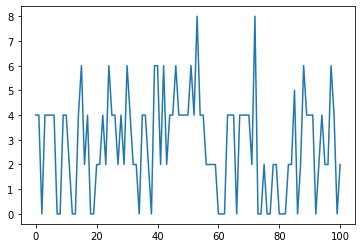

In [9]:
zoo_df['legs'].plot()

In [10]:
zoo_df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

<AxesSubplot:xlabel='type', ylabel='Count'>

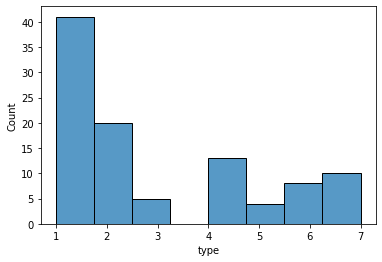

In [11]:
sns.histplot(zoo_df['type'])

# Model - 1 , with all features 

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
X = zoo_df.iloc[: ,1:-1]
Y = zoo_df.iloc[: ,-1]

In [14]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [15]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=4)
grid.fit(X, Y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [16]:
print(grid.best_score_)
print(grid.best_params_)
# Model accuracy for K =1 is 97%.

0.9703846153846154
{'n_neighbors': 1}


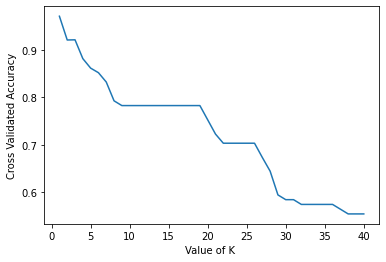

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K ')
plt.ylabel('Cross Validated Accuracy')
plt.show()
# Model having high accuracy for K value = 1 

In [18]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1_fit = cross_val_score(model_1,X,Y,cv=4)
model_1_fit.mean()

0.9703846153846154

# Model - 2 

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
test = SelectKBest(score_func=chi2 ,k =2)
fit  = test.fit(X,Y)

In [21]:
Scores = fit.scores_

In [22]:
df1 = pd.DataFrame(Scores,columns=['Scores'])
df1['Column_Names'] = pd.Series(X.columns)
df1.sort_values('Scores' ,ascending=False,inplace=True)

In [23]:
from sklearn.tree import  DecisionTreeClassifier

In [24]:
model1 = DecisionTreeClassifier(criterion='entropy')
fit_m = model1.fit(X,Y)

In [25]:
fit_m.feature_importances_

array([0.        , 0.22819856, 0.        , 0.40756971, 0.04157898,
       0.02199263, 0.01573959, 0.        , 0.16447111, 0.01495006,
       0.        , 0.08893255, 0.01656682, 0.        , 0.        ,
       0.        ])

In [26]:
df2 = pd.DataFrame(fit_m.feature_importances_ ,columns= ['Info Gained'])
df2['Column_Names'] = pd.Series(X.columns)
df2.sort_values('Info Gained' ,inplace=True ,ascending=False)

In [27]:
total =pd.merge(df1,df2, on ='Column_Names',how= 'outer')
Zoo = total.iloc[0:10 ,:]

In [28]:
Zoo
# Building model considering top 10 features 

,Scores,Column_Names,Info Gained
0,81.170621,legs,0.016567
1,81.000000,feathers,0.228199
2,62.553802,fins,0.088933
3,60.000000,milk,0.407570
4,49.214736,airborne,0.041579
5,48.833806,hair,0.000000
6,37.419719,eggs,0.000000
7,37.060056,toothed,0.000000
8,29.868970,aquatic,0.021993
9,20.976006,catsize,0.000000


In [29]:
zoo = zoo_df[['legs','feathers','fins','milk','airborne','hair','eggs','toothed','aquatic','catsize','type']]

In [30]:
zoo

,legs,feathers,fins,milk,airborne,hair,eggs,toothed,aquatic,catsize,type
0,4,0,0,1,0,1,0,1,0,1,1
1,4,0,0,1,0,1,0,1,0,1,1
2,0,0,1,0,0,0,1,1,1,0,4
3,4,0,0,1,0,1,0,1,0,1,1
4,4,0,0,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
96,2,0,0,1,0,1,0,1,0,1,1
97,6,0,0,0,1,1,1,0,0,0,6
98,4,0,0,1,0,1,0,1,0,1,1
99,0,0,0,0,0,0,1,0,0,0,7


In [31]:
x = zoo.iloc[:,0:-1]
y = zoo.iloc[: ,-1]

In [32]:
model_2 = KNeighborsClassifier(n_neighbors=1)
model_2_fit = cross_val_score(model_2,x,y,cv=4)
model_2_fit.mean()
#Model having accuracy of 95% 

0.9507692307692308

# Model - 3 , using train ,test split

In [33]:
from sklearn.model_selection import train_test_split

In [42]:
X_train ,X_test,Y_train , Y_test = train_test_split(X,Y,test_size=0.25)

In [43]:
model_3 = KNeighborsClassifier(n_neighbors=1)
model_3_fit = model_3.fit(X_train,Y_train)

In [44]:
test = model_3_fit.predict(X_test)
pd.crosstab(Y_test,test)


col_0,1,2,4,5,6,7
type,,,,,,
1,10,0,0,0,0,0
2,0,5,0,0,0,0
4,0,0,3,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,2,0
7,0,0,0,0,1,4


In [45]:
np.mean(test==Y_test)
# Model with 96% accuracy.

0.9615384615384616